## Import necessary libraries

In [1]:
import itertools #confusion matrix
import pandas as pd #data preprocessing
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
#to show all rows of the pandas dataframe
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/drug+review+dataset+druglib+com/drugLibTrain_raw.tsv', sep='\t')

In [3]:
df.head(5)

Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that they...   
3  The acid reflux went away for a few months aft...   
4  I think that the Lyrica was starting to help w...   

                                   sideEffectsReview  \
0  cough, hypotension , proteinuria, impotence , ...   
1  Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...   
2         Heavier bleeding and clotting than normal.   
3  Constipation, dry mouth and some mild dizzines...   
4  I felt extremely drugged and dopey.  Could not...   

                                      commentsReview  
0  monitor blood pressure , weight and asses for ...  
1  I Hate This Birth Control, I Would Not Suggest...  
2  I took 2 pills at the onset of my menstrual cr...  
3  I was given Prilosec prescription at a dose of...  
4                                          See above

In [4]:
df.condition.value_counts()

depression                                            236
acne                                                  165
anxiety                                                63
insomnia                                               54
birth control                                          49
high blood pressure                                    42
allergies                                              37
acid reflux                                            33
asthma                                                 33
migraines                                              31
hair loss                                              30
migraine                                               30
hypothyroidism                                         29
add                                                    28
high cholesterol                                       27
adhd                                                   26
fibromyalgia                                           23
hypertension  

In [5]:
df_train=df[(df['condition']=='birth control')| (df['condition']=='depression')| (df['condition']=='high blood pressure')| (df['condition']=='diabetes')]

In [6]:
df_train.head()

Unnamed: 0       urlDrugName  rating           effectiveness  \
7         2715            elavil      10  Considerably Effective   
12         959           sarafem       8  Considerably Effective   
34        2801        wellbutrin      10        Highly Effective   
40        1210            prozac       7  Considerably Effective   
50        3100  ortho-tri-cyclen      10        Highly Effective   

          sideEffects      condition  \
7     No Side Effects     depression   
12  Mild Side Effects     depression   
34  Mild Side Effects     depression   
40  Mild Side Effects     depression   
50    No Side Effects  birth control   

                                       benefitsReview  \
7   Although this drug was originally prescribed f...   
12  I found that this drug helps significantly wit...   
34  I have taken antidepressants for many years, a...   
40  relieves depression, helps other things such a...   
50           No undesired pregnancies, lighter period   

                                    sideEffectsReview  \
7                                               None.   
12  My sides effects were not noticeable and very ...   
34  A little bit of "hyper" feelings.  I take the ...   
40  Sleepy and lack of response to problems.  Took...   
50                                               none   

                                       commentsReview  
7      One a day, taken about an hour before bedtime.  
12  This was prescribes to me for treatment for de...  
34  I suffer chronic depression and the Wellbutrin...  
40  took a seemingly long period of time to become...  
50                                    One pill daily.

In [7]:
df.shape

(3107, 9)

In [8]:
df_train.shape

(339, 9)

In [9]:
df_train

Unnamed: 0                 urlDrugName  rating           effectiveness  \
7           2715                      elavil      10  Considerably Effective   
12           959                     sarafem       8  Considerably Effective   
34          2801                  wellbutrin      10        Highly Effective   
40          1210                      prozac       7  Considerably Effective   
50          3100            ortho-tri-cyclen      10        Highly Effective   
66          2285                     lexapro       6    Moderately Effective   
85           240               wellbutrin-xl       8  Considerably Effective   
107         1514                      lotrel       7  Considerably Effective   
109          385                   seasonale       9        Highly Effective   
110         2447               wellbutrin-sr       5    Moderately Effective   
123         3270                      zoloft       6    Moderately Effective   
127         3226                    nuvaring      10        Highly Effective   
144         3271                      zoloft       9        Highly Effective   
153          591                  zestoretic      10        Highly Effective   
163         1181                      prozac       3    Marginally Effective   
170         2201                   enalapril       6    Moderately Effective   
172         1524                  glucophage       7    Moderately Effective   
174          884                       paxil       6  Considerably Effective   
175         2544                   lopressor       8        Highly Effective   
183         3665                  effexor-xr       5    Moderately Effective   
198         2262                     lexapro       1    Moderately Effective   
204         3303                      zoloft       8  Considerably Effective   
207         2320                     lexapro       7    Moderately Effective   
212          878                       paxil       1    Moderately Effective   
214         1770                  citalopram       8        Highly Effective   
218         1789                  citalopram      10        Highly Effective   
226         1791                  citalopram       1             Ineffective   
228          228               wellbutrin-xl       7    Moderately Effective   
234          235               wellbutrin-xl       9  Considerably Effective   
237         3885                     abilify       6  Considerably Effective   
240         2445               wellbutrin-sr      10        Highly Effective   
249         1843                      yasmin      10        Highly Effective   
258         3312                      zoloft       9  Considerably Effective   
264         2810                  wellbutrin       7        Highly Effective   
283         2667                    prinivil       4    Marginally Effective   
289         3697                  effexor-xr       9  Considerably Effective   
310         1114                     effexor       7    Moderately Effective   
323         1106                     effexor       7  Considerably Effective   
332          656                  seasonique       6        Highly Effective   
334         2494                     remeron       2             Ineffective   
350         1786                  citalopram       4    Moderately Effective   
351         1191                      prozac       7  Considerably Effective   
353         2256                     lexapro       8  Considerably Effective   
381         4004                      celexa       8  Considerably Effective   
399         2790                  wellbutrin       6  Considerably Effective   
403         1178                      prozac       8  Considerably Effective   
418         2498                     remeron       3             Ineffective   
430         1203                      prozac       6  Considerably Effective   
434         1772                  citalopram       7  Considerably Effective   
435   

In [10]:
X = df_train.drop(['Unnamed: 0','urlDrugName', 'rating','effectiveness'], axis=1)

## EDA

In [11]:
X.condition.value_counts()

depression             236
birth control           49
high blood pressure     42
diabetes                12
Name: condition, dtype: int64

In [12]:
X.head()

sideEffects      condition  \
7     No Side Effects     depression   
12  Mild Side Effects     depression   
34  Mild Side Effects     depression   
40  Mild Side Effects     depression   
50    No Side Effects  birth control   

                                       benefitsReview  \
7   Although this drug was originally prescribed f...   
12  I found that this drug helps significantly wit...   
34  I have taken antidepressants for many years, a...   
40  relieves depression, helps other things such a...   
50           No undesired pregnancies, lighter period   

                                    sideEffectsReview  \
7                                               None.   
12  My sides effects were not noticeable and very ...   
34  A little bit of "hyper" feelings.  I take the ...   
40  Sleepy and lack of response to problems.  Took...   
50                                               none   

                                       commentsReview  
7      One a day, taken about an hour before bedtime.  
12  This was prescribes to me for treatment for de...  
34  I suffer chronic depression and the Wellbutrin...  
40  took a seemingly long period of time to become...  
50                                    One pill daily.

In [13]:
#segregating dataframe for anlyzing different condition
X_birth = X[(X['condition']=='birth control')]
X_dep = X[(X['condition']=='depression')]
X_bp = X[(X['condition']=='high blood pressure')]
X_diab = X[(X['condition']=='diabetes')]

In [14]:
!pip3 install wordcloud

## Check for the most frequent review for a condition

Text(0.5, 1.0, 'Word Cloud for birth control')

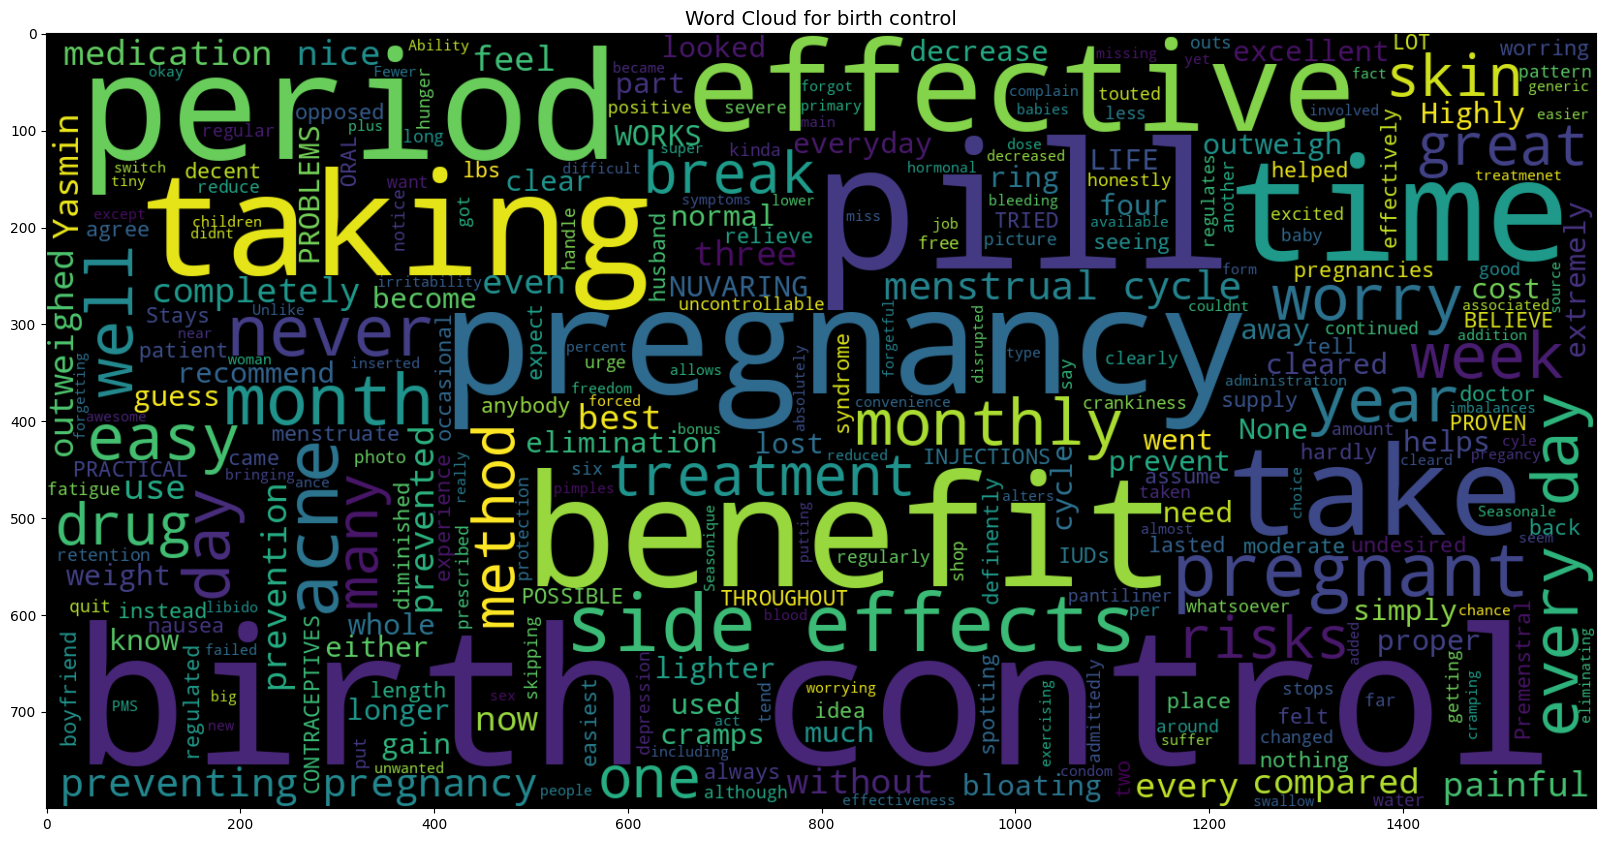

In [15]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) #Text that is Fake News Headlines
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(X_birth.benefitsReview))
plt.imshow(wc, interpolation = 'bilinear')
plt.title("Word Cloud for birth control", fontsize=14)

Text(0.5, 1.0, 'Word Cloud for depression')

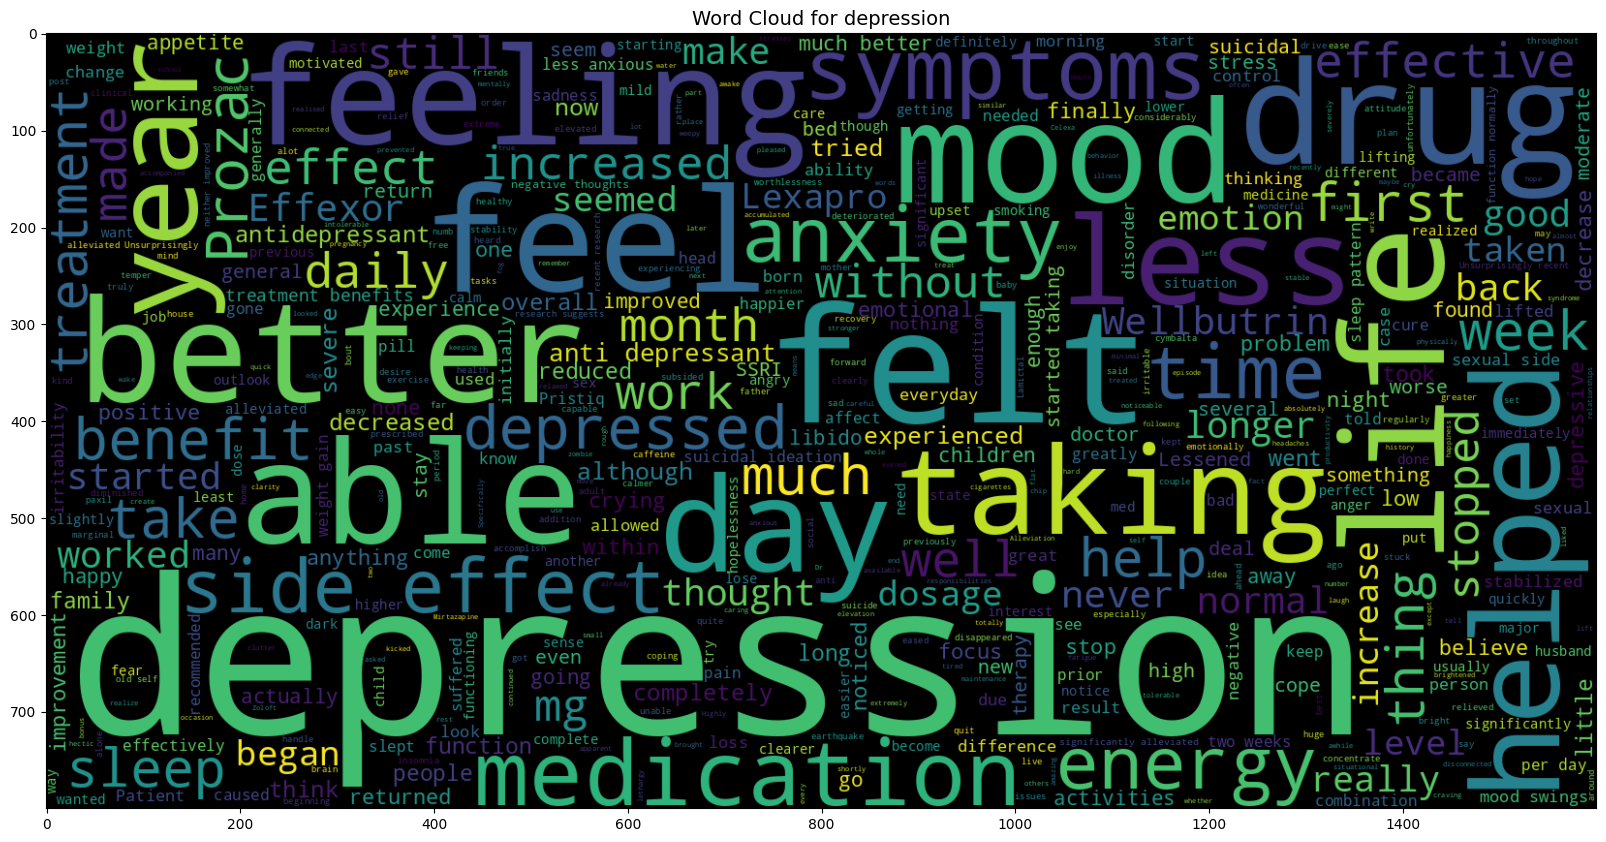

In [16]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) #Text that is Fake News Headlines
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(X_dep.benefitsReview))
plt.imshow(wc, interpolation = 'bilinear')
plt.title("Word Cloud for depression", fontsize=14)

Text(0.5, 1.0, 'Word Cloud for high blood pressure')

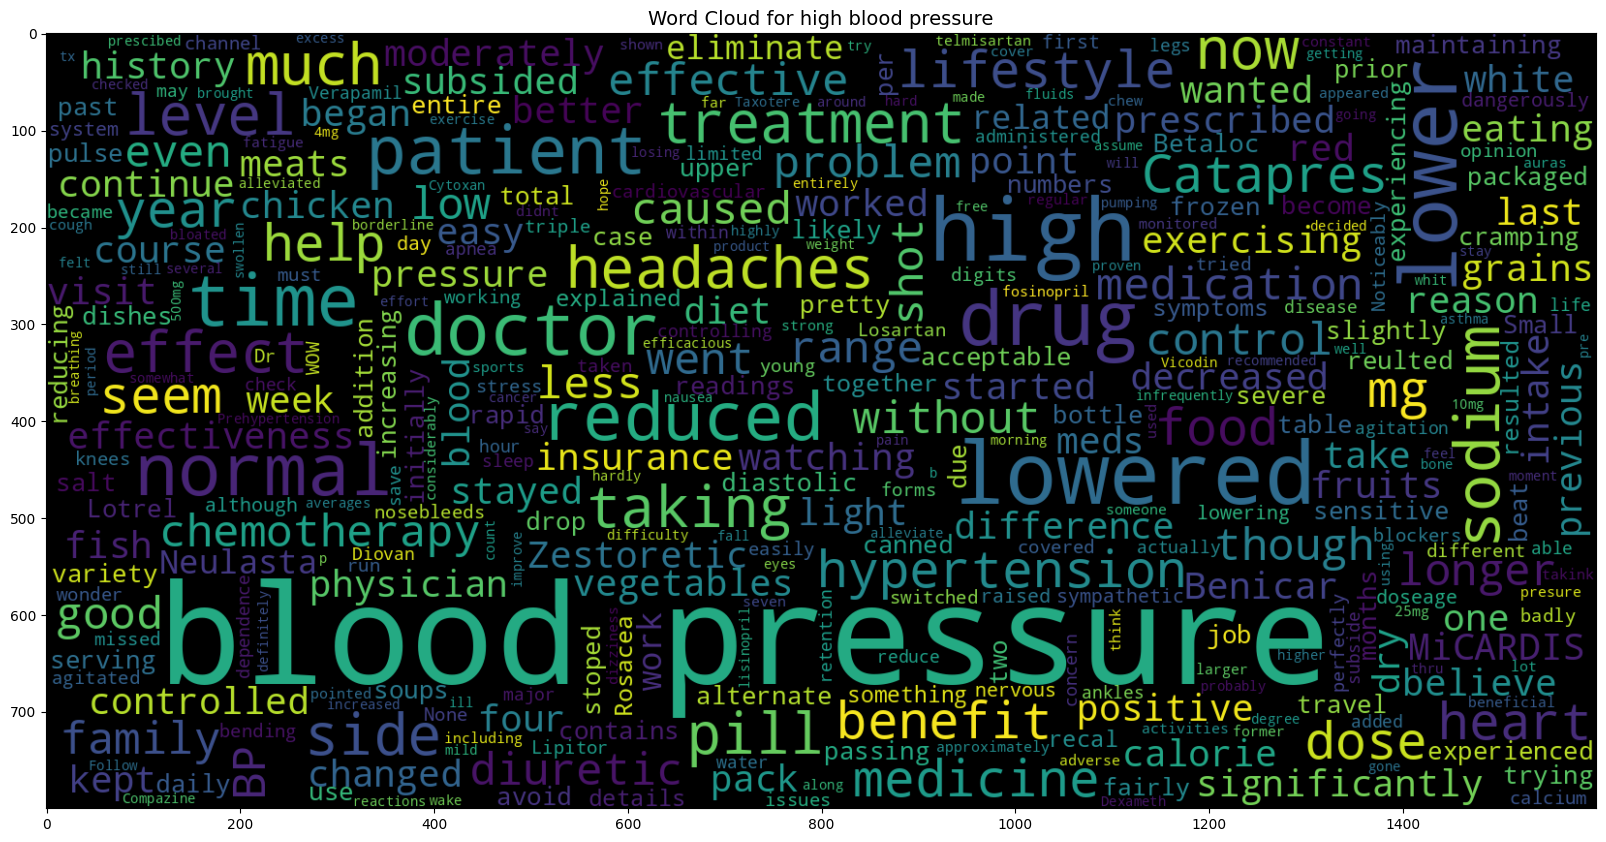

In [17]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) #Text that is Fake News Headlines
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(X_bp.benefitsReview))
plt.imshow(wc, interpolation = 'bilinear')
plt.title("Word Cloud for high blood pressure", fontsize=14)

Text(0.5, 1.0, 'Word Cloud for diabetes')

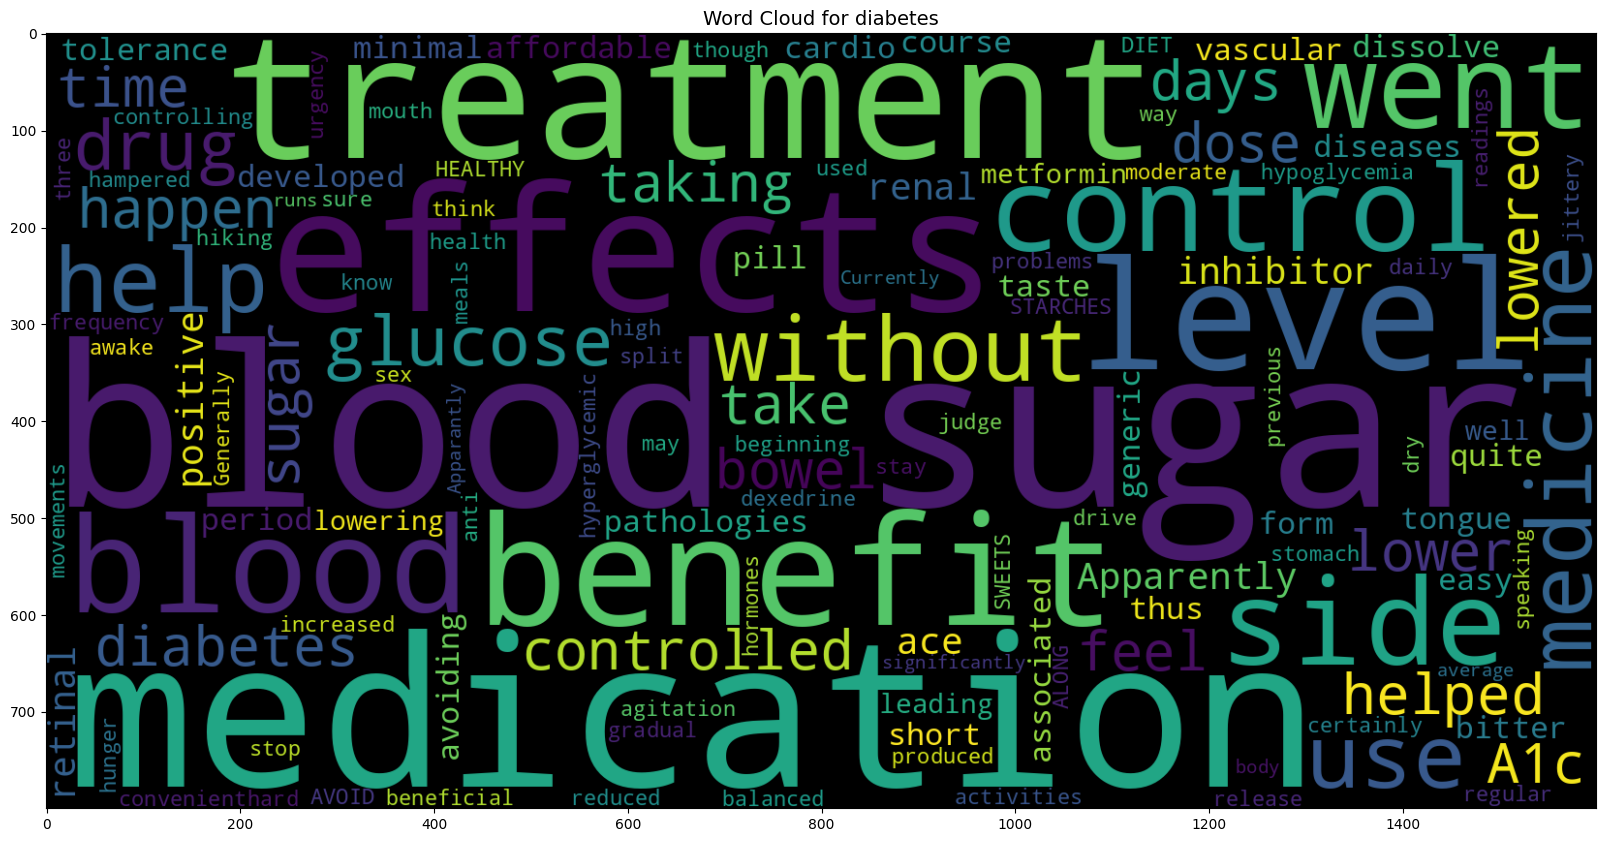

In [18]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) #Text that is Fake News Headlines
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(X_diab.benefitsReview))
plt.imshow(wc, interpolation = 'bilinear')
plt.title("Word Cloud for diabetes", fontsize=14)

## data preprocessing

In [19]:
X['benefitsReview'][7]

"Although this drug was originally prescribed for depression, it helped with sleeplessness. Therefore, I have continued to take it for that alone. While I still on occasion have problems falling asleep, I find I can combine it with Melatonin or Valerian. In 12 years, I haven't had to increase the elavil dosage."

In [20]:
X['benefitsReview'][12]

'I found that this drug helps significantly with my level of depression and monthly irritability that occurs around my menstrual cycles.'

In [21]:
for i, col in enumerate(X.columns):
  X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [22]:
#To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

<ipython-input-22-5bac85c97b84>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [23]:
X.head()

sideEffects      condition  \
7   No Side Effects    depression      
12  Mild Side Effects  depression      
34  Mild Side Effects  depression      
40  Mild Side Effects  depression      
50  No Side Effects    birth control   

                                                                                                                                                                                                                                                                                                             benefitsReview  \
7   Although this drug was originally prescribed for depression, it helped with sleeplessness. Therefore, I have continued to take it for that alone. While I still on occasion have problems falling asleep, I find I can combine it with Melatonin or Valerian. In 12 years, I haven't had to increase the elavil dosage.   
12  I found that this drug helps significantly with my level of depression and monthly irritability that occurs around my menstrual cycles.                                                                                                                                                                                   
34  I have taken antidepressants for many years, and this is first that did not flip the switch on sexuality.  I no longer feel like I am looking out of a dark room.  I have more energy, feel more motivated, and overall function at a higher level than before.                                                           
40  relieves depression, helps other things such as sleep, dieting, exercise, relationships, responses to stimulous.  The cost is lower than other antidepressants which can be a help to those on a budget.                                                                                                                  
50  No undesired pregnancies, lighter period                                                                                                                                                                                                                                                                                  

                                                                                                                                                                                                                                                                                 sideEffectsReview  \
7   None.                                                                                                                                                                                                                                                                                            
12  My sides effects were not noticeable and very mild.  I have noticed some lower libido while on Fluoxetine, but no other noticeable side effects.                                                                                                                                                 
34  A little bit of hyper feelings.  I take the entire dose at one time, daily, and have been advised that the feeling of being revved up would disspiate if I did take it in two or more doses during the day.  I try to minimize the effect by taking the medication first thing in the morning.   
40  Sleepy and lack of response to problems.  Took too long to get started.  I think anyone else would think it wasn't effective and stop taking it.                                                                                                                                                 
50  none                                                                                                                                                                                                                                                                                             

                                                                                         

In [24]:
!pip install nltk

In [25]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [27]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Lemmitization

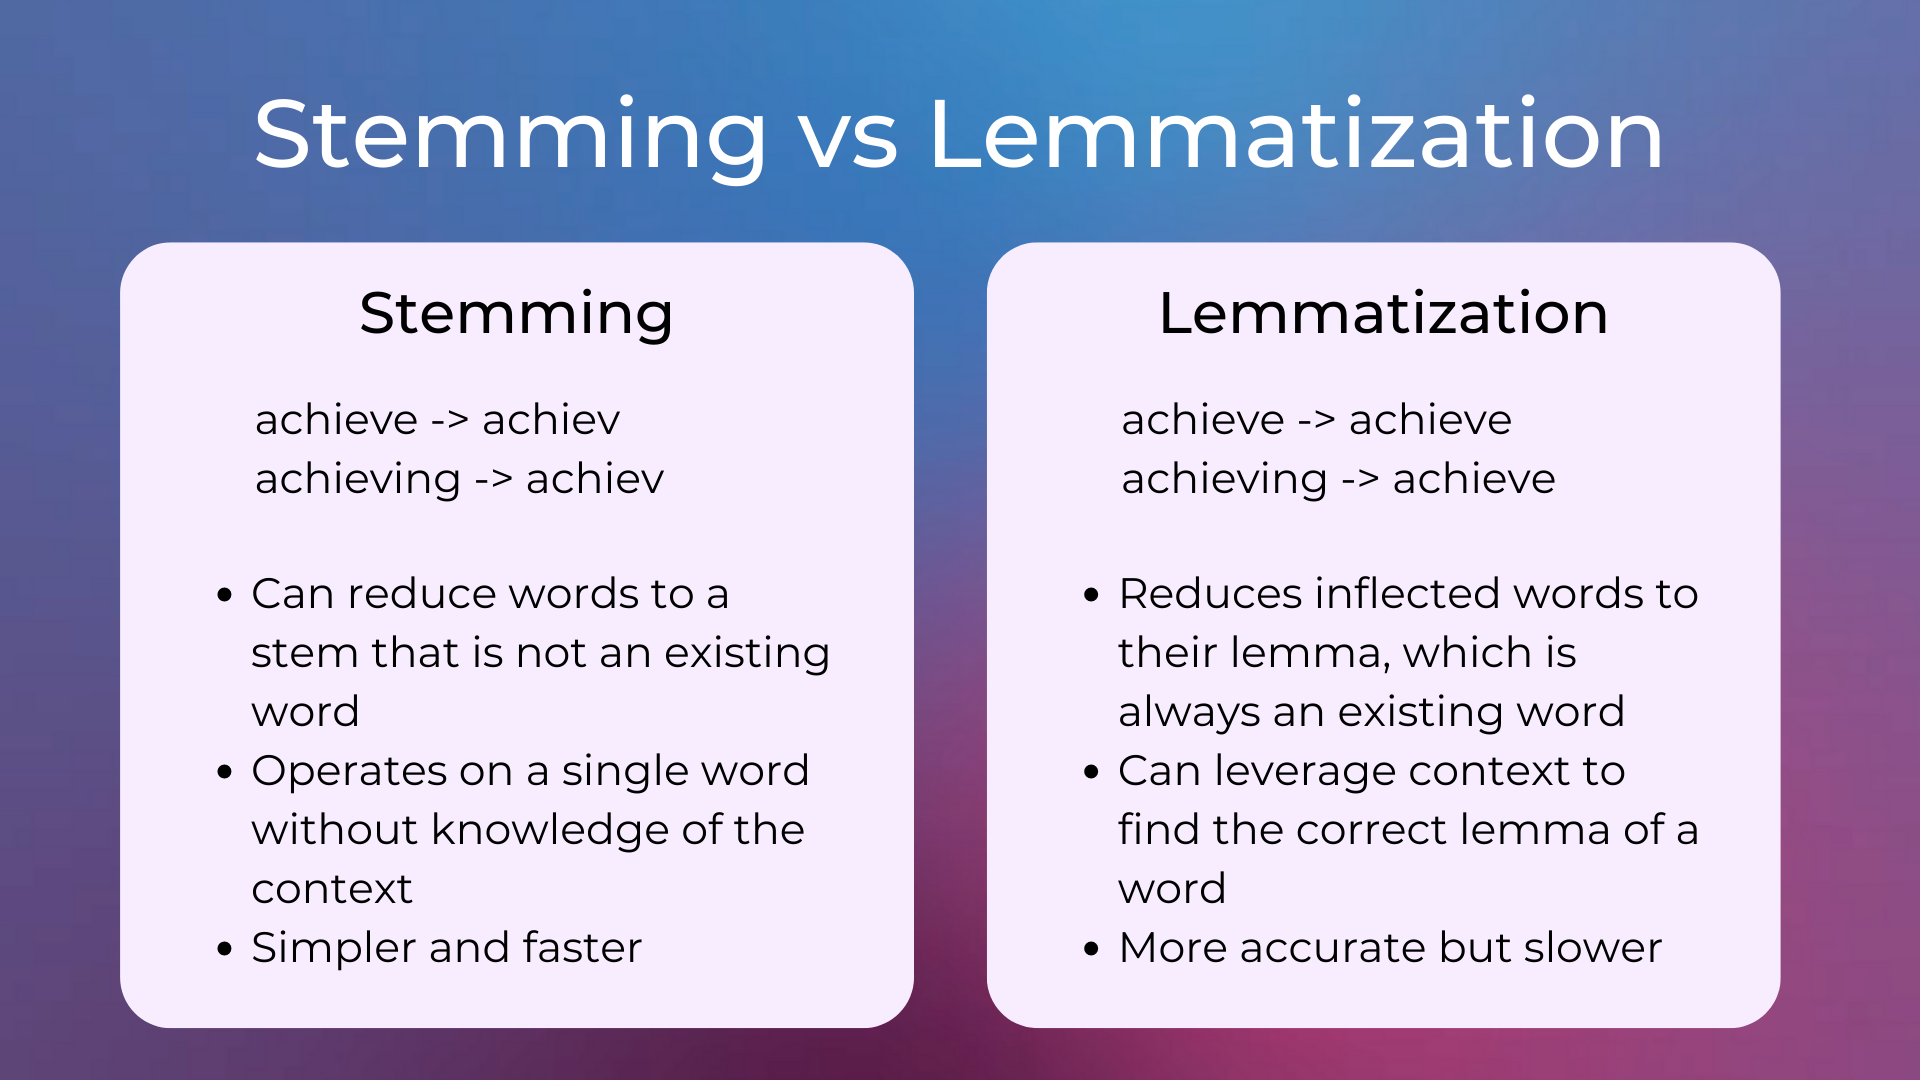

In [29]:
from IPython.display import Image
Image(filename='/content/stemming_vs_lemmatization.png')

In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()


In [31]:
print(porter.stem('sportingly'))
print(porter.stem('very'))
print(porter.stem('troubled'))

sportingli
veri
troubl


In [34]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/n

True

In [37]:
print(lemmatizer.lemmatize('sportingly'))
print(lemmatizer.lemmatize('very'))
print(lemmatizer.lemmatize('troubled'))

sportingly
very
troubled


In [38]:
from bs4 import BeautifulSoup
import re

In [39]:
def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [40]:
X['review_clean'] = X['benefitsReview'].apply(review_to_words)

<ipython-input-39-96d5791fc591>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [41]:
X.head()

sideEffects      condition  \
7   No Side Effects    depression      
12  Mild Side Effects  depression      
34  Mild Side Effects  depression      
40  Mild Side Effects  depression      
50  No Side Effects    birth control   

                                                                                                                                                                                                                                                                                                             benefitsReview  \
7   Although this drug was originally prescribed for depression, it helped with sleeplessness. Therefore, I have continued to take it for that alone. While I still on occasion have problems falling asleep, I find I can combine it with Melatonin or Valerian. In 12 years, I haven't had to increase the elavil dosage.   
12  I found that this drug helps significantly with my level of depression and monthly irritability that occurs around my menstrual cycles.                                                                                                                                                                                   
34  I have taken antidepressants for many years, and this is first that did not flip the switch on sexuality.  I no longer feel like I am looking out of a dark room.  I have more energy, feel more motivated, and overall function at a higher level than before.                                                           
40  relieves depression, helps other things such as sleep, dieting, exercise, relationships, responses to stimulous.  The cost is lower than other antidepressants which can be a help to those on a budget.                                                                                                                  
50  No undesired pregnancies, lighter period                                                                                                                                                                                                                                                                                  

                                                                                                                                                                                                                                                                                 sideEffectsReview  \
7   None.                                                                                                                                                                                                                                                                                            
12  My sides effects were not noticeable and very mild.  I have noticed some lower libido while on Fluoxetine, but no other noticeable side effects.                                                                                                                                                 
34  A little bit of hyper feelings.  I take the entire dose at one time, daily, and have been advised that the feeling of being revved up would disspiate if I did take it in two or more doses during the day.  I try to minimize the effect by taking the medication first thing in the morning.   
40  Sleepy and lack of response to problems.  Took too long to get started.  I think anyone else would think it wasn't effective and stop taking it.                                                                                                                                                 
50  none                                                                                                                                                                                                                                                                                             

                                                                                         

## Creating features and Target Variable

In [42]:
X_feat=X['review_clean']
y=X['condition']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Bag of Words

In [45]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [46]:
count_train

<271x1364 sparse matrix of type '<class 'numpy.int64'>'
	with 4039 stored elements in Compressed Sparse Row format>

## **Machine Learning Model : Naive Bayes**

accuracy:   0.882
Confusion matrix, without normalization


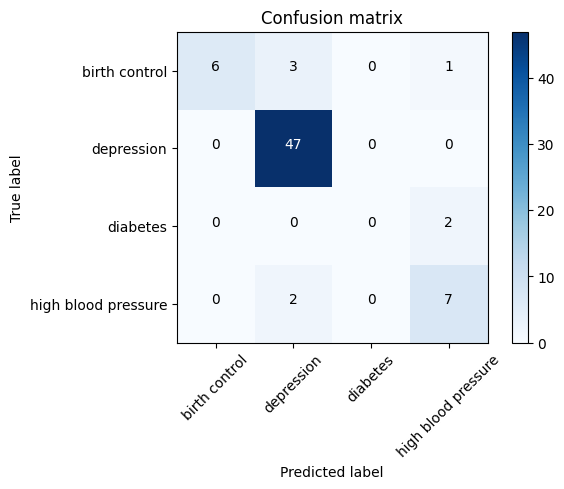

In [48]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['birth control', 'depression','diabetes','high blood pressure'])
plot_confusion_matrix(cm, classes=['birth control', 'depression','diabetes','high blood pressure'])

## **Machine Learning Model : Passive Aggressive Classifier**

accuracy:   0.956
Confusion matrix, without normalization


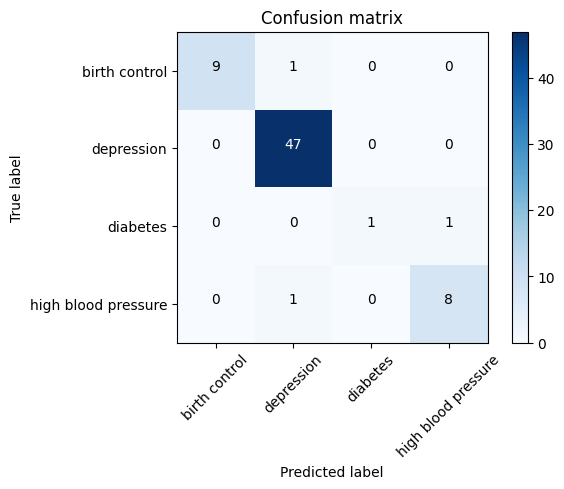

In [49]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['birth control', 'depression','diabetes','high blood pressure'])
plot_confusion_matrix(cm, classes=['birth control', 'depression','diabetes','high blood pressure'])

## **TFIDF**

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

accuracy:   0.735
Confusion matrix, without normalization


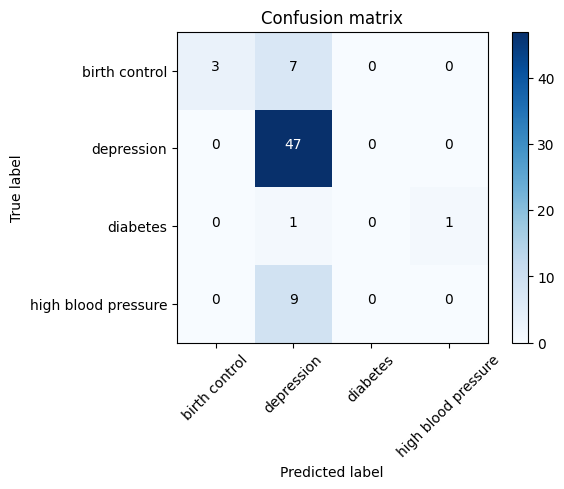

In [51]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['birth control', 'depression','diabetes','high blood pressure'])
plot_confusion_matrix(cm, classes=['birth control', 'depression','diabetes','high blood pressure'])

accuracy:   0.941
Confusion matrix, without normalization


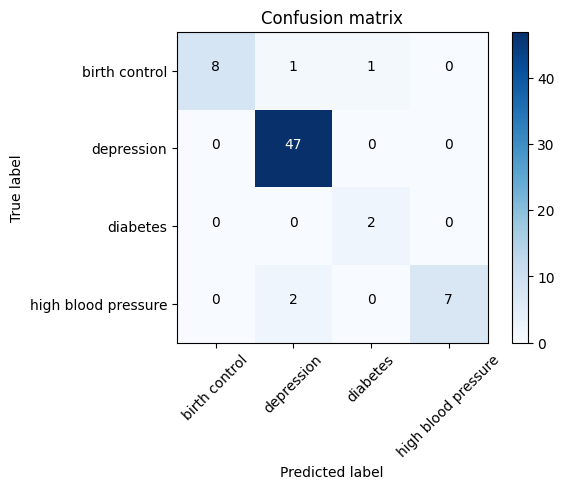

In [52]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['birth control', 'depression','diabetes','high blood pressure'])
plot_confusion_matrix(cm, classes=['birth control', 'depression','diabetes','high blood pressure'])

## **TFIDF: Bigrams**

accuracy:   0.912
Confusion matrix, without normalization


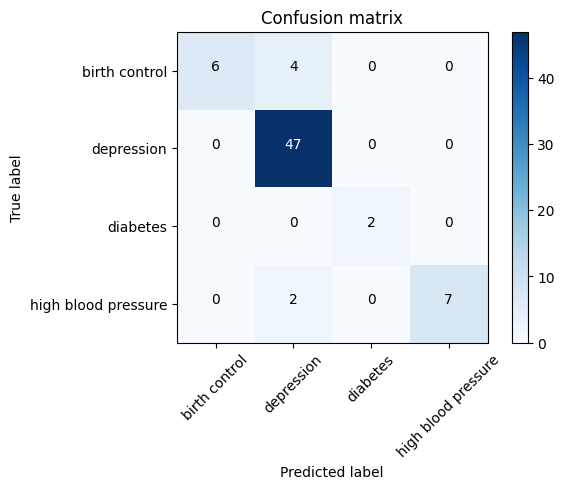

In [53]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['birth control', 'depression','diabetes','high blood pressure'])
plot_confusion_matrix(cm, classes=['birth control', 'depression','diabetes','high blood pressure'])

## **TFIDF : Trigrams**

accuracy:   0.926
Confusion matrix, without normalization


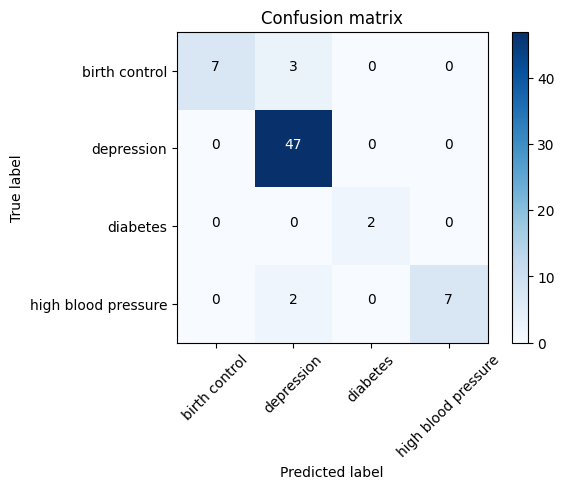

In [54]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['birth control', 'depression','diabetes','high blood pressure'])
plot_confusion_matrix(cm, classes=['birth control', 'depression','diabetes','high blood pressure'])

## **Most important Features**

In [56]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'birth control')

birth control medical 0.37858088448779725
birth control medication 0.37858088448779725
birth control wellburin 0.4033420303289987
birth control dish 0.4374954638912539
birth control treat 0.4536541967835034
birth control relieved 0.4669623025077164
birth control helplessness 0.706951095667514
birth control behaviour 0.7719313019332711
birth control pas 1.474241163519476
birth control passing 1.474241163519476


In [58]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'depression')

depression balanced 0.3242316540367144
depression swing 0.32772030466414437
depression disorder 0.33307150281899534
depression starting 0.34836668760871287
depression treatment 0.3850387311191417
depression extreme 0.3916317131775463
depression dbt 0.40018281274909684
depression nauseous 0.8819492691788593
depression eliminating 1.0017864945757242
depression ache 1.1638310183732066


In [59]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'high blood pressure')

high blood pressure floor 0.39035644532928027
high blood pressure good 0.39035644532928027
high blood pressure got 0.39035644532928027
high blood pressure gp 0.39035644532928027
high blood pressure resolved 0.40855848843261594
high blood pressure sleep 0.4731185073029154
high blood pressure responsibility 0.7132888456344538
high blood pressure relates 1.449646021387755
high blood pressure pleased 1.7293423020410543
high blood pressure possible 2.4683343866135905


In [60]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'diabetes')

diabetes hard 0.366370481503834
diabetes handle 0.3731285396366301
diabetes hanging 0.3731285396366301
diabetes looking 0.3731285396366301
diabetes losartan 0.3731285396366301
diabetes point 0.3731285396366301
diabetes pointed 0.3731285396366301
diabetes pleased 0.4282332261068436
diabetes pleasure 0.5630701187478413
diabetes productivity 1.1211772689996107


## **Sample Predictions**

In [62]:
X.head()

sideEffects      condition  \
7   No Side Effects    depression      
12  Mild Side Effects  depression      
34  Mild Side Effects  depression      
40  Mild Side Effects  depression      
50  No Side Effects    birth control   

                                                                                                                                                                                                                                                                                                             benefitsReview  \
7   Although this drug was originally prescribed for depression, it helped with sleeplessness. Therefore, I have continued to take it for that alone. While I still on occasion have problems falling asleep, I find I can combine it with Melatonin or Valerian. In 12 years, I haven't had to increase the elavil dosage.   
12  I found that this drug helps significantly with my level of depression and monthly irritability that occurs around my menstrual cycles.                                                                                                                                                                                   
34  I have taken antidepressants for many years, and this is first that did not flip the switch on sexuality.  I no longer feel like I am looking out of a dark room.  I have more energy, feel more motivated, and overall function at a higher level than before.                                                           
40  relieves depression, helps other things such as sleep, dieting, exercise, relationships, responses to stimulous.  The cost is lower than other antidepressants which can be a help to those on a budget.                                                                                                                  
50  No undesired pregnancies, lighter period                                                                                                                                                                                                                                                                                  

                                                                                                                                                                                                                                                                                 sideEffectsReview  \
7   None.                                                                                                                                                                                                                                                                                            
12  My sides effects were not noticeable and very mild.  I have noticed some lower libido while on Fluoxetine, but no other noticeable side effects.                                                                                                                                                 
34  A little bit of hyper feelings.  I take the entire dose at one time, daily, and have been advised that the feeling of being revved up would disspiate if I did take it in two or more doses during the day.  I try to minimize the effect by taking the medication first thing in the morning.   
40  Sleepy and lack of response to problems.  Took too long to get started.  I think anyone else would think it wasn't effective and stop taking it.                                                                                                                                                 
50  none                                                                                                                                                                                                                                                                                             

                                                                                         